# Credit Karma Marketing Case Analysis 

### Target Questions 
1. Which version is the best? 
2. Why do you think the version that won performed well? What was the Button copy?
3. What percent of users open their emails within a day of sending?

### Data preprocessing

In [299]:
# For data processing and plotting 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# For regression 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [42]:
# load datasets 
email_df = pd.read_csv("email-data.csv")
email_vars = pd.read_csv("email-variants.csv")

# Checking unique variables 
print("VARIANTS")
print(email_vars["Variant"].unique(), "Total:", len(email_vars["Variant"].unique()))
print("SUBJECT LINE")
print(email_vars["Subject Line"].unique())
print("FIRST NAME")
print(email_vars["First Name"].unique())
print("DESIGN")
print(email_vars["Design"].unique())
print("BUTTON")
print(email_vars["Button"].unique())


VARIANTS
['A1' 'A2' 'A3' 'A4' 'B1' 'B2' 'B3' 'B4' 'C1' 'C2' 'C3' 'C4' 'D1' 'D2'
 'D3' 'D4' 'E1' 'E2' 'E3' 'E4' 'F1' 'F2' 'F3' 'F4' 'G1' 'G2' 'G3' 'G4'
 'H1' 'H2' 'H3' 'H4'] Total: 32
SUBJECT LINE
['Credit Karma is a Great Place to Work!'
 'Credit Karma is Hiring Smart People!']
FIRST NAME
['Exclude' 'Include']
DESIGN
['Version 0' 'Version 1' 'Version 2' 'Version 3']
BUTTON
['Apply for This Job' 'Submit Application']


In [264]:
# merge tables 
df = pd.merge(email_df, email_vars, on = "Variant", how = "left") 

# reformat dates to codeable formats 
df['Sent'] = pd.to_datetime(df['Sent'], errors = "ignore")
df['Opened'] = pd.to_datetime(df['Opened'], errors = "ignore")
df['Clicked'] = pd.to_datetime(df['Clicked'], errors = "ignore")

# add column for checking if email was opened or clicked 
df["open"] = np.where(df["Opened"] != "0", 1, 0)
df["click"] = np.where(df["Clicked"] != "0", 1, 0)

display(df.head(n = 10))



,Variant,Sent,Opened,Clicked,Subject Line,First Name,Design,Button,open,click
0,B4,2013-08-13 13:13:00,8/13/13 13:13,0,Credit Karma is Hiring Smart People!,Exclude,Version 3,Apply for This Job,1,0
1,E1,2013-08-13 13:13:00,8/13/13 13:14,0,Credit Karma is a Great Place to Work!,Exclude,Version 0,Submit Application,1,0
2,G3,2013-08-13 13:15:00,8/13/13 13:15,0,Credit Karma is a Great Place to Work!,Include,Version 2,Submit Application,1,0
3,G3,2013-08-13 13:15:00,8/13/13 13:15,0,Credit Karma is a Great Place to Work!,Include,Version 2,Submit Application,1,0
4,G3,2013-08-13 13:21:00,8/13/13 13:22,0,Credit Karma is a Great Place to Work!,Include,Version 2,Submit Application,1,0
5,G3,2013-08-13 14:12:00,8/13/13 14:17,0,Credit Karma is a Great Place to Work!,Include,Version 2,Submit Application,1,0
6,G3,2013-08-13 14:17:00,8/13/13 14:18,8/13/13 15:23,Credit Karma is a Great Place to Work!,Include,Version 2,Submit Application,1,1
7,A3,2013-08-13 14:19:00,0,0,Credit Karma is a Great Place to Work!,Exclude,Version 2,Apply for This Job,0,0
8,B3,2013-08-13 14:19:00,0,0,Credit Karma is Hiring Smart People!,Exclude,Version 2,Apply for This Job,0,0
9,E4,2013-08-13 14:19:00,8/13/13 15:43,0,Credit Karma is a Great Place to Work!,Exclude,Version 3,Submit Application,1,0


In [305]:
print("Short summary of data:")
print("% of emails opened:", df['open'].mean())
print("% of buttons clicked:", df['click'].mean())
print("% of buttons clicked from opened emails:", round(df[df['open'] == 1]['click'].mean(),4))

Short summary of data:
% of emails opened: 0.2982
% of buttons clicked: 0.0324
% of buttons clicked from opened emails: 0.1009


## 1. Which version is the best? 

### Best for opening emails 
**Note**: We only look at variants, subject line and first name because these are the only features that users see when they are about to open an email  

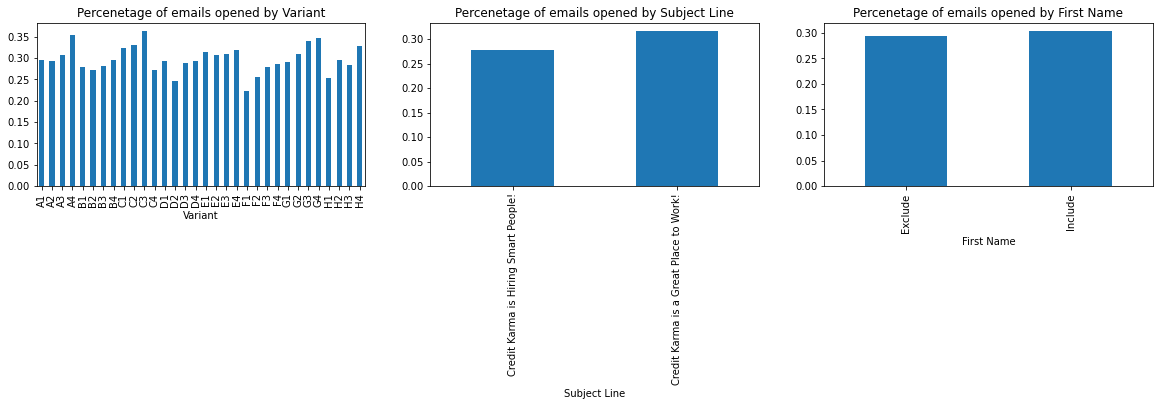

In [346]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,3))

email_open_var = df.groupby(["Variant"])['open'].mean()
email_open_var.plot(ax = axes[0], kind = 'bar', title = "Percenetage of emails opened by Variant")

email_open_subj = df.groupby(["Subject Line"])['open'].mean()
email_open_subj.plot(ax = axes[1], kind = 'bar', title = "Percenetage of emails opened by Subject Line")

email_open_name = df.groupby(["First Name"])['open'].mean()
email_open_name.plot(ax = axes[2], kind = 'bar', title = "Percenetage of emails opened by First Name")


plt.show()

In [352]:
print("Highest % based on Variant", max(email_open_var))
print("Highest % based on Subject Line", max(email_open_subj))
print("Highest % based on Subject Line", max(email_open_name))
print("Best email for opening: C3, \n With factors: Subject Line - Great place for hire, First Name - Include")

Highest % based on Variant 0.36363636363636365
Highest % based on Subject Line 0.3174418604651163
Highest % based on Subject Line 0.30398497809305236
Best email for opening: C3, 
 With factors: Subject Line - Great place for hire, First Name - Include


### Best for Clicking the Button in Opened Emails 

**Note:** We only look at opened emails since users cannot see the content of the email and its interior features if not opened and therefore not necessary for this part of the analysis. 

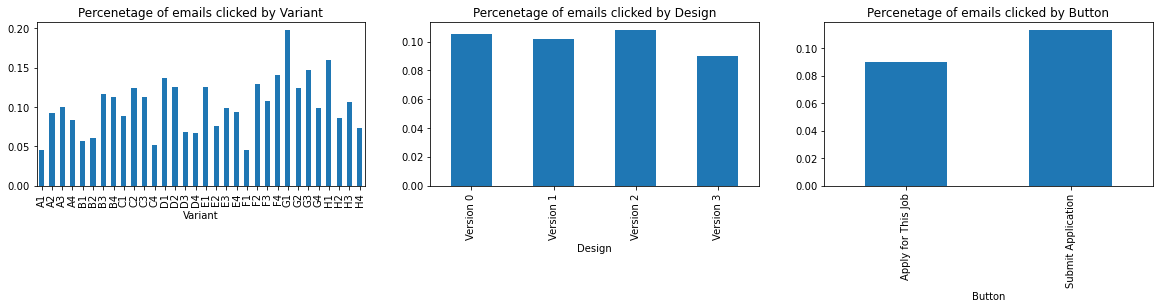

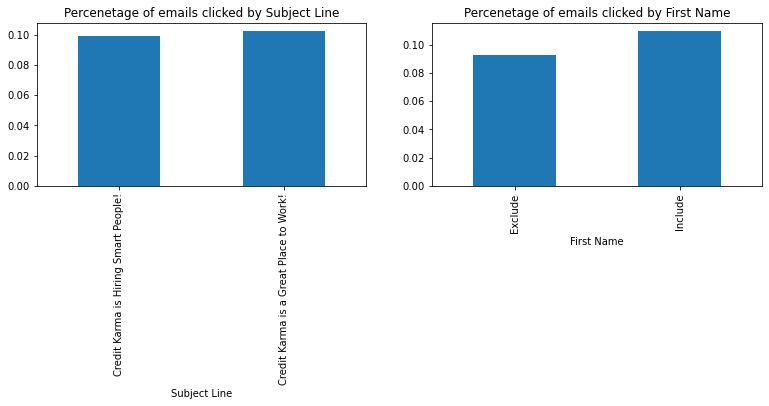

In [360]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,3))

ver_clicked = df[df['open'] == 1]

email_clicked_var = ver_clicked.groupby(["Variant"])['click'].mean()
email_clicked_var.plot(ax = axes[0], kind = 'bar', title = "Percenetage of emails clicked by Variant")

email_clicked_des = ver_clicked.groupby(["Design"])['click'].mean()
email_clicked_des.plot(ax = axes[1], kind = 'bar', title = "Percenetage of emails clicked by Design")

email_clicked_button = ver_clicked.groupby(["Button"])['click'].mean()
email_clicked_button.plot(ax = axes[2], kind = 'bar', title = "Percenetage of emails clicked by Button")

plt.show()

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (13,3))

email_clicked_subj = ver_clicked.groupby(["Subject Line"])['click'].mean()
email_clicked_subj.plot(ax = axes[0], kind = 'bar', title = "Percenetage of emails clicked by Subject Line")

email_clicked_name = ver_clicked.groupby(["First Name"])['click'].mean()
email_clicked_name.plot(ax = axes[1], kind = 'bar', title = "Percenetage of emails clicked by First Name")

plt.show()



In [356]:
print("Highest % based on Variant", max(email_clicked_var))
print("Highest % based on Design", max(email_clicked_des))

print("Best email for clicking: G1, \n With Factors: Version 2, Subject Line - Great Place to Work, First Name - Include")

Highest % based on Variant 0.19753086419753085
Highest % based on Design 0.10783055198973042
Best email for clicking: G1, 
 With Factors: Version 2, Subject Line - Great Place to Work, First Name - Include


## 2. Why is that version the best? What was the button copy?

### The best email version to be opened

**NOTE:** We assume that users only see the subject line and first name before opening their email. Other variables are not considered 

In [386]:
open_df_logreg = df.copy() 

# One Hot Encoding for better regression results 
open_df_logreg = pd.get_dummies(open_df_logreg, prefix=['subject_line_'], columns = ['Subject Line'])
open_df_logreg = pd.get_dummies(open_df_logreg, prefix=['first_name_'], columns = ['First Name'])

# only select subject line and first name 
X = open_df_logreg.iloc[:,8:]
y = open_df_logreg['open']

# Get relationship of email features and opening emails 
logit_model=sm.Logit(y,X) # we use logit since we are dealing with categorical var. 
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.608293
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   open   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Wed, 30 Mar 2022   Pseudo R-squ.:                0.001705
Time:                        02:17:49   Log-Likelihood:                -6082.9
converged:                       True   LL-Null:                       -6093.3
Covariance Type:            nonrobust   LLR p-value:                 0.0001172
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
subject_line__Credit Kar

In [387]:
# Show odds based on coefficients 
1 - np.exp(result.params)

subject_line__Credit Karma is Hiring Smart People!      0.409150
subject_line__Credit Karma is a Great Place to Work!    0.283617
first_name__Exclude                                     0.368697
first_name__Include                                     0.329521
dtype: float64

### The best email version to be clicked 

Here, we now consider all variables to acquire the coefficients in our regression 



In [388]:
click_df_logreg =  df[df['open'] == 1].copy()


# One Hot Encoding for better regression results 
click_df_logreg = pd.get_dummies(click_df_logreg, prefix=['subject_line_'], columns = ['Subject Line'])
click_df_logreg = pd.get_dummies(click_df_logreg, prefix=['first_name_'], columns = ['First Name'])
click_df_logreg = pd.get_dummies(click_df_logreg, prefix=['design_'], columns = ['Design'])
click_df_logreg = pd.get_dummies(click_df_logreg, prefix=['button_'], columns = ['Button'])

X = click_df_logreg.iloc[:,6:] # all 10 columns for regression 
y = click_df_logreg['click']

# Get relationship of email features and opening emails 
logit_model=sm.Logit(y,X) # we use logit since we are dealing with categorical var. 
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.325715
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  click   No. Observations:                 2982
Model:                          Logit   Df Residuals:                     2975
Method:                           MLE   Df Model:                            6
Date:                Wed, 30 Mar 2022   Pseudo R-squ.:                0.004359
Time:                        02:17:59   Log-Likelihood:                -971.28
converged:                       True   LL-Null:                       -975.54
Covariance Type:            nonrobust   LLR p-value:                    0.2034
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
subject_line__Credit Kar

In [389]:
# Show odds based on coefficients 
1 - np.exp(result.params)

subject_line__Credit Karma is Hiring Smart People!      0.480402
subject_line__Credit Karma is a Great Place to Work!    0.450134
first_name__Exclude                                     0.511228
first_name__Include                                     0.415455
design__Version 0                                       0.230265
design__Version 1                                       0.259904
design__Version 2                                       0.215326
design__Version 3                                       0.360845
button__Apply for This Job                              0.529062
button__Submit Application                              0.393318
dtype: float64

## 3. What percent of users open their emails within a day of sending?

In [390]:
df['Sent'] = pd.to_datetime(df['Sent'], errors = 'coerce', format = '%Y-%d-%m')
df['Opened'] = pd.to_datetime(df['Opened'], errors = 'coerce', format = '%Y-%d-%m')

df.loc[(df['Opened'] >= '2013-08-13') & (df['Opened'] < '2013-08-14')].shape[0]/df.shape[0]

0.2172